In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

def read_adjusted_ppl():
    def concate(path):
        dfs = []
        paths = glob(path)
        for p in paths:
            p = pd.read_csv(p)
            dfs.append(p)
        df = pd.concat(dfs)
        return df
    df_valid = concate("../data/adjusted_metrics/valid_*.csv")
    df_test = concate("../data/adjusted_metrics/test_*.csv")
    df_valid = df_valid.drop_duplicates()
    df_test = df_test.drop_duplicates()
    return df_valid, df_test


def join_adjusted_ppl(path):
    df = pd.read_csv(p)
    df1 = pd.merge(df, DF_V, on='model_path')
    assert df1.shape[0] == df.shape[0]
    return df1


DF_V, DF_T = read_adjusted_ppl()

COLORS = ['black', 'mediumseagreen', 'darkorange']
MARKERS = ['.', '+', '^']
AVERAGE = True

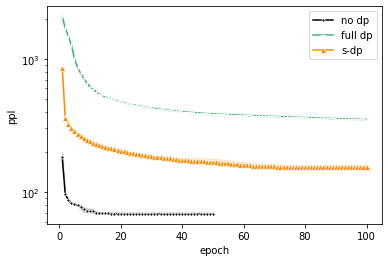

In [34]:
## ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0], color=COLORS[0], marker=MARKERS[0], label='no dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0], color=COLORS[1], marker=MARKERS[1], label='full dp')
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0], color=COLORS[2], marker=MARKERS[2], label='s-dp')
plt.legend(loc="upper right", prop={'size':10})
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.yscale('log')

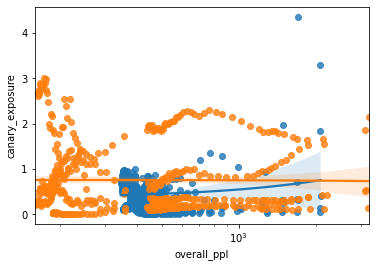

In [77]:
## Canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)

xvar = 'overall_ppl'
yvar = 'canary_exposure'
plotfunc = sns.regplot
df1 = df_nodps[df_nodps.epoch!=0]
df2 = df_dps[df_dps.epoch!=0]
df3 = df_partialdps[df_partialdps.epoch!=0]

# ax = plotfunc(x=xvar, y=yvar, data=df1)
ax = plotfunc(x=xvar, y=yvar, data=df2)
ax = plotfunc(x=xvar, y=yvar, data=df3)
plt.xscale('log')

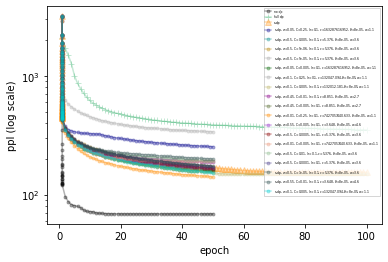

In [108]:
from matplotlib import colors as mcolors


default_colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[8:]

default_colors = ['darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet']

#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=1
alpha = 0.3
x_var = 'epoch'
metrics = 'overall_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


# for other parameters
#partial dp
df_partialdps_params = []
for p in glob(os.path.join(BASE_DIR, "membership_inference/partialdp/final_fix/param_search", "*.csv")):
    try:
        df_partialdps_params.append(join_adjusted_ppl(p))
    except:
        print(p)
# df_partialdps = pd.concat(df_partialdps)


for i, df_partialdp_param in enumerate(df_partialdps_params):
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp_param.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    # label = "s-dp"
    label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp_param.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp_param.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp_param.iloc[-1]['model_alpha']}"
    scatters = plot_func(df_partialdp_param[x_var].tolist()[1:], df_partialdp_param[metrics].tolist()[1:], color=default_colors[i], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[0])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':3})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

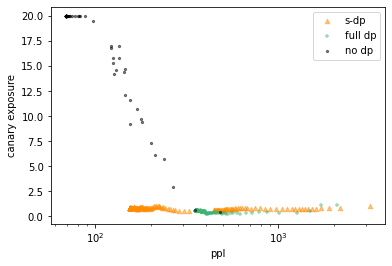

In [63]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])







# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

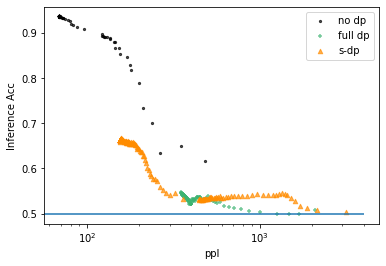

In [57]:
# membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

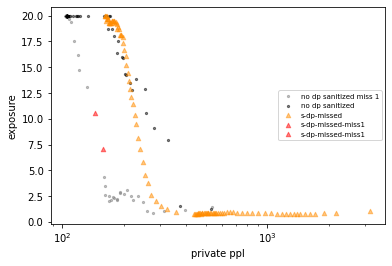

In [15]:
# missed experiments
#nodp normalized
df_nodps_normalized_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized_miss1", "*")):
    df_nodps_normalized_miss1.append(join_adjusted_ppl(p))

#nodp normalized
df_partialdps_missed_miss1 = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed_1", "test", "*")):
    df_partialdps_missed_miss1.append(pd.read_csv(p))


df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(join_adjusted_ppl(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(join_adjusted_ppl(p))





# missed
dot_size=20
alpha = 0.5
# x_var, y_var = "private_ppl", "canary_exposure"
# x_var, y_var = "epoch", "private_ppl"
x_var, y_var = "overall_ppl", "canary_exposure"




# average
if True:
    df_nodps_normalized_miss1 = [average_by_epoch(df_nodps_normalized_miss1, x_var, y_var)]
    df_nodps_normalized = [average_by_epoch(df_nodps_normalized, x_var, y_var)]
    df_partialdps_missed = [average_by_epoch(df_partialdps_missed, x_var, y_var)]



NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


for i, df_nodp_normalized_miss1 in enumerate(df_nodps_normalized_miss1):
    plot_func(df_nodp_normalized_miss1[x_var].tolist()[1:], df_nodp_normalized_miss1[y_var].tolist()[1:], color='grey', marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized miss 1')


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color=COLORS[0], marker=MARKERS[0], s=dot_size, alpha=alpha, label='no dp sanitized')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color=COLORS[2], marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))


for i, df_partialdp in enumerate(df_partialdps_missed_miss1):
    df_partialdp = df_partialdp.iloc[:100]
    label = "s-dp-missed-miss1"
    # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp['model_ppl'].tolist(), df_partialdp[y_var].tolist(), color='red', marker=MARKERS[2], s=dot_size, alpha=alpha, label=label)





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="right", prop={'size':7})
plt.xscale('log')
plt.xlabel('private ppl')
plt.ylabel('exposure')
plt.show()

In [14]:
df_partialdp['model_ppl'].tolist()[1:]

[]

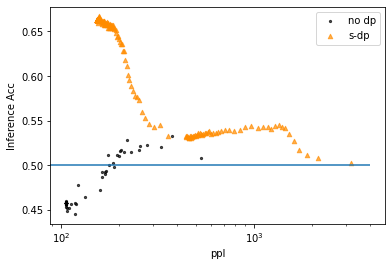

In [121]:
# missed membership inference
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp_normalized", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)


#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "final_concat", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=4000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]




for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('Inference Acc')
plt.show()

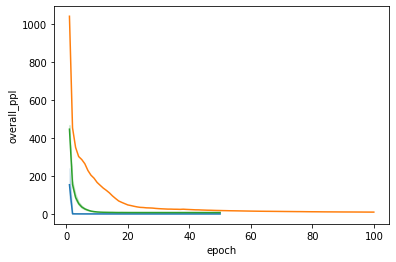

In [10]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
df_partialdps = pd.concat(df_partialdps)


ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_nodps[df_nodps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_dps[df_dps.epoch!=0])
ax = sns.lineplot(x="epoch", y="overall_ppl", data=df_partialdps[df_partialdps.epoch!=0])
plt.yscale('log')

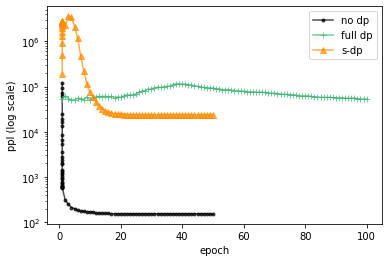

In [116]:
## dialog, ppl vs epoch
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)



dot_size=3
alpha = 0.7
x_var = 'epoch'
metrics = 'private_ppl'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = plt.plot

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]



for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], #s=dot_size, 
    alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], #s=dot_size, 
    alpha=alpha, label='full dp', marker=MARKERS[1])



for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], #s=dot_size, 
    alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))



# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl (log scale)')
plt.show()

In [117]:
df_partialdps, df_dps, df_nodps

([    epoch   private_ppl
  0     0.0  5.022537e+04
  1     1.0  1.914540e+05
  2     1.0  5.049322e+05
  3     1.0  9.036273e+05
  4     1.0  1.272646e+06
  ..    ...           ...
  62   46.0  2.354888e+04
  63   47.0  2.354888e+04
  64   48.0  2.354888e+04
  65   49.0  2.354888e+04
  66   50.0  2.354888e+04
  
  [67 rows x 2 columns]],
 [     epoch   private_ppl
  0      0.0  50527.963057
  1      1.0  53567.795722
  2      2.0  61512.349959
  3      3.0  54123.175357
  4      4.0  50289.899840
  ..     ...           ...
  96    96.0  55490.198051
  97    97.0  54115.679850
  98    98.0  53330.681306
  99    99.0  52776.259921
  100  100.0  52899.526864
  
  [101 rows x 2 columns]],
 [    epoch    private_ppl
  0     0.0   50225.373566
  1     1.0  121863.659325
  2     1.0   94414.839533
  3     1.0   62773.402898
  4     1.0   73708.781521
  ..    ...            ...
  77   46.0     153.861578
  78   47.0     153.861574
  79   48.0     153.861574
  80   49.0     153.861572
  81   5

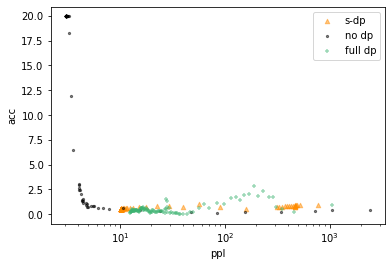

In [70]:
# dialog, canary insertion
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog",  "nodp", "bs32", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "dp", "final", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dialog", "partialdp", "final",  "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.5
x_var = 'overall_ppl'
metrics = 'canary_exposure'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


# plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('canary exposure')
plt.show()

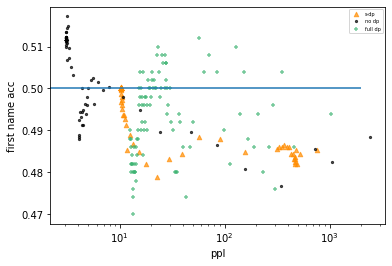

In [78]:
# dialog, membership inference, full name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

plt.hlines(0.5, xmin=0, xmax=2000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('first name acc')
plt.show()

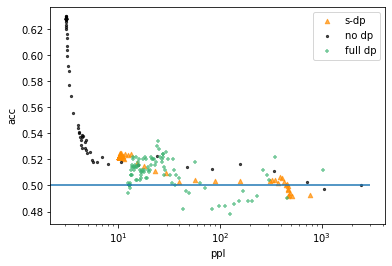

In [79]:
# dialog, membership inference, first name
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "nodp", "final_fix_firstname", "*.csv")):
    df_nodps.append(join_adjusted_ppl(p))
# df_nodps = pd.concat(df_nodps)

#full dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "dp", "final_fix_firstname", "*.csv")):
    df_dps.append(join_adjusted_ppl(p))
# df_dps = pd.concat(df_dps)

#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "dialog", "partialdp", "final_fix_firstname", "*.csv")):
    df_partialdps.append(join_adjusted_ppl(p))
# df_partialdps = pd.concat(df_partialdps)


dot_size=20
alpha = 0.7
x_var = 'overall_ppl'
metrics = 'inference_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter
plt.hlines(0.5, xmin=0, xmax=3000)

# average
if AVERAGE:
    df_nodps = [average_by_epoch(df_nodps, x_var, metrics)]
    df_dps = [average_by_epoch(df_dps, x_var, metrics)]
    df_partialdps = [average_by_epoch(df_partialdps, x_var, metrics)]


for i, df_partialdp in enumerate(df_partialdps):
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    label = "s-dp"
    # label = f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=COLORS[2], s=dot_size, alpha=alpha, label=label, marker=MARKERS[2])
    # scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[metrics].tolist()[1:], color=COLORS[0], s=dot_size, alpha=alpha, label='no dp', marker=MARKERS[0])


for i, df_dp in enumerate(df_dps):
    plot_func(df_dp[x_var].tolist()[1:], df_dp[metrics].tolist()[1:], color=COLORS[1], s=dot_size, alpha=alpha, label='full dp', marker=MARKERS[1])


plt.legend(loc="upper right", prop={'size': 10})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()